#**Section 1**

--------------------------------------------------------------------------
**1.1 Librarys used in this assignment**

*   sklearn
*   pandas
*   matplotlib
*   math

--------------------------------------------------------------------------

In [ ]:
# google colab settings
from google.colab import drive 
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/CSE518_HW1'

# sklearn + pandas
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# sys libs
import math


--------------------------------------------------------------------------

**1.2 Function for model training, predicting and plotting**

This function uses x, y to train a linear regression model for Fitts Law. After training a model, a, b, R2, RMSE will also be shown. I used sklearn.metrics.r2_score() and sklearn.metrics.mean_squared_error(), math.sqrt() to calculate R Squared and RMSE. In addition, I used Matplotlib for plotting graphs, the actual value will be displayed in scatters and the predicted value will be displayed in lines.

**Input Parameters:**
* x: Index of Difficulties (Actual Value)
* y: Movement Time (Actual Value)
* username: The name of user, e.g. "All Users", "User1", "User2"

**Output Parameters:**
*   x: Index of Difficulties (Actual Value)
*   Y_predict: Movement Time (Predicted Value)
--------------------------------------------------------------------------








  
  

In [ ]:
def generate_model(x, y, username):
    # X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=None)

    # Train linear_regression model
    model = linear_model.LinearRegression()
    model.fit(x, y)

    print(username)
    print("a:", model.intercept_)
    print("b:", model.coef_[0])

    # Model prediction
    Y_predict = model.predict(x)
    # Y_test = list(Y_test)

    print("R2:", r2_score(y, Y_predict))

    # RMSE
    RMSE = math.sqrt(mean_squared_error(y, Y_predict))
    print("RMSE:", RMSE)

    # Plot
    plt.title("Linear Regression Model - " + username)
    plt.scatter(x, y, c="#2ae0c8", label="Actual Value")
    plt.plot(x, Y_predict, label="Prediction")
    plt.legend(loc=2)
    plt.xlabel("ID")
    plt.ylabel("MT")
    plt.grid(True)
    plt.show()

    return x, Y_predict

--------------------------------------------------------------------------
**1.3 Load data and obtain useful columns**

API used: pd.read_csv()


--------------------------------------------------------------------------

In [ ]:
if __name__ == "__main__":
    # Load data
    raw_data = pd.read_csv("GROUP1_FL.csv")
    # sampled_raw_data = raw_data.sample(frac=0.25)

    '''
    Model for all data
    '''
    # Get Distance, Width, MT
    col_width = raw_data['width']
    col_distances = raw_data['distance']
    col_MT = raw_data['movement_time']

--------------------------------------------------------------------------
**1.4 Calculating ID using distances and width**

Formula used: ID = log2(D/W + 1)


--------------------------------------------------------------------------

In [ ]:
    # Index of Difficulty
    col_ID = []

    for index in range(0, len(raw_data)):
        # ID = log2(D/W + 1)
        dw_term = col_distances[index] / col_width[index]
        log2_term = math.log2(dw_term + 1)
        col_ID.append([log2_term])

    del col_width
    del col_distances

--------------------------------------------------------------------------
**1.5 Models for all users and each user**

1 model for all users.

3 other models for 3 users.

--------------------------------------------------------------------------




All Users
a: 145.75497988621805
b: 174.47678099887557
R2: 0.4122424281520315
RMSE: 190.8434514573631


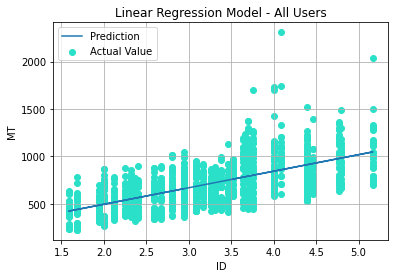

______________________________________________________
User1
a: 172.47690822969764
b: 198.22699704284216
R2: 0.5229825005832339
RMSE: 172.6897578910486


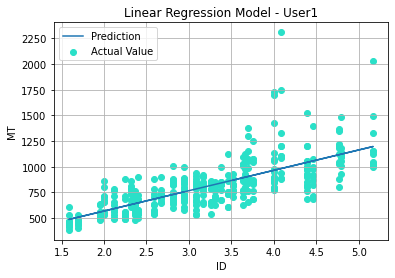

______________________________________________________
User2
a: 212.13157738036466
b: 181.49194771069202
R2: 0.5819297156746335
RMSE: 141.48461403779325


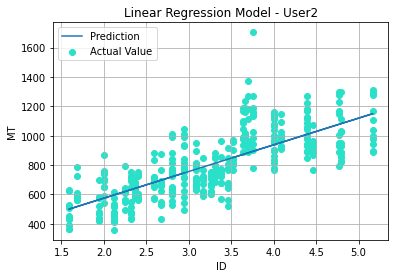

______________________________________________________
User3
a: 40.09588274024094
b: 150.32946213107905
R2: 0.7659125003378402
RMSE: 76.11505644270038


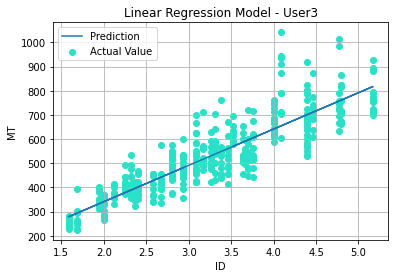

In [ ]:
    '''
    Model for all users
    '''
    users_X_test, users_Y_predict = generate_model(col_ID, col_MT, "All Users")

    '''
    Models for each user
    
    data:
        User1 rows: [:366]
        User2 rows: [366:743]
        User3 rows: [743:]
    '''

    user1_col_ID = col_ID[:366]
    user2_col_ID = col_ID[366:743]
    user3_col_ID = col_ID[743:]

    user1_col_MT = col_MT[:366]
    user2_col_MT = col_MT[366:743]
    user3_col_MT = col_MT[743:]

    print("______________________________________________________")
    # Model1 result
    user1_X_test, user1_Y_predict = generate_model(user1_col_ID, user1_col_MT, "User1")

    print("______________________________________________________")
    # Model2 result
    user2_X_test, user2_Y_predict = generate_model(user2_col_ID, user2_col_MT, "User2")

    print("______________________________________________________")
    # Model3 result
    user3_X_test, user3_Y_predict = generate_model(user3_col_ID, user3_col_MT, "User3")

--------------------------------------------------------------------------
**1.6 Comparison**

Here I also plotted 4 models together into one graph for comparison.

--------------------------------------------------------------------------

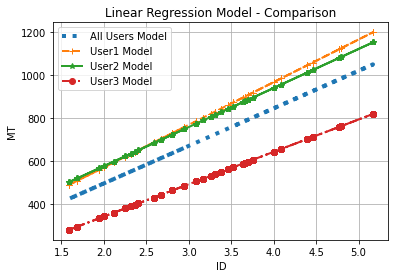

In [ ]:
    '''
    Comparison
    '''
    plt.figure()
    plt.title("Linear Regression Model - Comparison")
    plt.plot(users_X_test, users_Y_predict, linewidth=4, linestyle=":", label="All Users Model", marker='')
    plt.plot(user1_X_test, user1_Y_predict, linewidth=2, linestyle="--", label="User1 Model", marker='+')
    plt.plot(user2_X_test, user2_Y_predict, linewidth=2, linestyle="-", label="User2 Model", marker='*')
    plt.plot(user3_X_test, user3_Y_predict, linewidth=2, linestyle="-.", label="User3 Model", marker="o")
    plt.legend(loc=2)
    plt.xlabel("ID")
    plt.ylabel("MT")
    plt.grid(True)
    plt.show()

--------------------------------------------------------------------------
**1.7 Observations & Final Conclusion**

**Observations**

*   ID and MT are positively related.
*   R2 and RMSE are negatively related.
*   The model of user1 and user2 are very similar to each other.
*   In terms of MT, the model of user3 is better than all other models.
*   The difference between the value of 'a's are very obvious. Whereas the difference range for 'b' are smaller.
*   Since the R2 of the model for all users is about 0.41, using linear regression didn't generate a very good model for all users. But for each user's model, their models are slightly better since they have higher R2 value and lower RMSE.


**Final Conclusion**
*   For this dataset, the value of 'a' contributes most to the different performance of each model in terms of MT.
*   Using more user's real data as training data, the model's accuracy will likely to drop instead of increase.
*   Fitts Law can provide us a rough model to describe the relationship between ID and MT, but real world data are much more complex. 

--------------------------------------------------------------------------

#**Section 2**

--------------------------------------------------------------------------
**2.1 Function for model training, predicting and plotting**

This function uses x, y to train a linear regression model for Steering Law. After training a model, a, b, R2, RMSE will also be shown. I used sklearn.metrics.r2_score() and sklearn.metrics.mean_squared_error(), math.sqrt() to calculate R Squared and RMSE. In addition, I used Matplotlib for plotting graphs, the actual value will be displayed in scatters and the predicted value will be displayed in lines.

**Input Parameters:**

* x: Index of Difficulties (Actual Value)
* y: Movement Time (Actual Value)
* taskname: The name of task, e.g. "All Tasks", "Task1", "Task2"
* show_params: True/False
* show_graph: True/False

**Output Parameters:**

* x: Index of Difficulties (Actual Value)
* Y_predict: Movement Time (Predicted Value)
* model: Trained Model  

--------------------------------------------------------------------------

In [ ]:
def generate_model_sl(x, y, taskname, show_params, show_graph):
    # X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=None)
    # Train linear_regression model
    model = linear_model.LinearRegression()
    model.fit(x, y)

    # Model prediction
    Y_predict = model.predict(x)
    # Y_test = list(Y_test)

    if show_params:
        print(taskname)
        # a, b
        print("a:", model.intercept_)
        print("b:", model.coef_[0])
        # R2
        print("R2:", r2_score(y, Y_predict))
        # RMSE
        RMSE = math.sqrt(mean_squared_error(y, Y_predict))
        print("RMSE:", RMSE)

    # Plot
    if show_graph:
        plt.title("Linear Regression Model - " + taskname)
        plt.scatter(x, y, c="#2ae0c8", label="Actual Value")
        plt.plot(x, Y_predict, label="Prediction")
        plt.legend(loc=2)
        plt.xlabel("ID")
        plt.ylabel("MT")
        plt.grid(True)
        plt.show()

    return x, Y_predict, model

--------------------------------------------------------------------------
**2.2 Load data and obtain useful columns**

API used: pd.read_csv()


--------------------------------------------------------------------------

In [ ]:
if __name__ == "__main__":
    # Load data
    raw_data = pd.read_csv("GROUP1_SL.csv")

    col_amplitude = raw_data['amplitude']
    col_width = raw_data['width']
    col_MT = raw_data['movetime']
    col_ID = []

--------------------------------------------------------------------------
**2.3 Calculating ID using amplitude and width**

Formula used: ID = D/W (A/W)


--------------------------------------------------------------------------

In [ ]:
    for index in range(0, len(raw_data)):
        # ID = (D/W)
        dw_term = col_amplitude[index] / col_width[index]
        col_ID.append([dw_term])

    del col_amplitude
    del col_width

--------------------------------------------------------------------------
**2.4 Models for all task and each task**

Here I generated 1 model for all tasks. I also tried to generate models for each task. But, within a specific task, all data points share the same ID, so data points for each task can not provide us good linear regression models. To be specific, we can't even obtain a good line. The 'b' for Steering Law would be 0, and the R Squared will also be 0.

--------------------------------------------------------------------------

All Tasks
a: 21.210218958404823
b: 38.095759514909425
R2: 0.8466174227465608
RMSE: 63.78077457539843


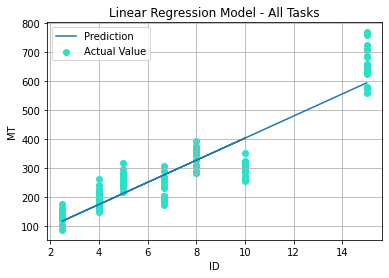

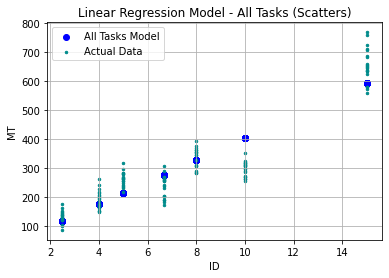

In [ ]:
    '''
    Model for all tasks
    '''
    tasks_X_test, tasks_Y_predict, model0 = generate_model_sl(col_ID, col_MT, "All Tasks", show_params=True, show_graph=True)
    plt.figure()
    plt.title("Linear Regression Model - All Tasks (Scatters)")
    plt.scatter(tasks_X_test, tasks_Y_predict, label="All Tasks Model", c="blue")
    plt.scatter(col_ID, col_MT, label="Actual Data", c="#008B8B", s=6)
    plt.legend(loc=2)
    plt.xlabel("ID")
    plt.ylabel("MT")
    plt.grid(True)
    plt.show()

--------------------------------------------------------------------------
**2.5 Observations & Final Conclusion**

**Observations**
*   ID and MT are positively related
*   Based on Steering Law, we obtained a model with R2 greater than 0.8, mathematically we can view this model as a reasonable model.
*   Although we obtained a model with R2 greater than 0.8, this model still have some limitations. For example, when ID equals 8, this model can produce reasonable prediction, but when ID equals 10, the predicted MT is even larger than the largest actual value. One major reason for this phenomenon might result from the complexity of the real world data - even the ID of a task is stable, the performance of user is not stable.


**Final Conclusion**
*   Steering Law can reflect the rough relationship between ID and MT, but its limitation are also obvious, its prediction might not very accurate. In general, real data are more complex than ideal models.

--------------------------------------------------------------------------